# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject #This module contains the utlity function

# Question 1

I construct a function which solves the maximisation probelm using that utility is monotonically increasing in c and a solver. 

In [2]:
#initial arbitrary parametervalues
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4
w = 1

#Objective function (to minimize)
def value_of_choice(l, m, v, epsilon, tau0, tau1, kappa, w):
    x = m + w*l - (tau0 * w * l + tau1* np.max(w * l - kappa, 0))
    c = x #Monotonicity dicates this in solution
    return -inauguralproject.u_func(l, c, v, epsilon) #the negative utility function is minimised thus the utility function is maximised

#Call solver
sol = optimize.minimize_scalar(value_of_choice, method = 'bounded', bounds=(0,1),args = (m,v,epsilon,tau0,tau1,kappa,w))

#Unpack entire solution
l = sol.x
c = m + w*l - (tau0 * w * l + tau1* np.max(w * l - kappa, 0))
u = inauguralproject.u_func(l, c, v, epsilon)

# Question 2

Using a loop and the above function, a range of wage levels are analysed and relevant equilibrum values are saved throughout. Finally, the equilibrium values of labour and consumption are plotted against the wage rate.

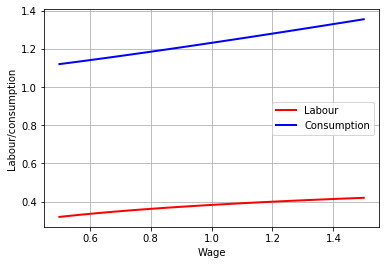

In [3]:
#Initialise empty arrays for labour and consumption
l_array = np.empty((0,100))
c_array = np.empty((0,100))

#Given parameter values
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4
w_list = np.arange(0.5, 1.51, 0.01).tolist() #list of wages in the interval [0.5,1.5] in intervals of 0.01

for i,w in enumerate(w_list): #loops over list of wages
    #Objective function (to minimize)
    def value_of_choice(l, m, v, epsilon, tau0, tau1, kappa, w):
        x = m + w*l - (tau0 * w * l + tau1* np.max(w * l - kappa, 0))
        c = x #Monotonicity dicates this in solution
        return -inauguralproject.u_func(l, c, v, epsilon) #the negative utility function is minimised thus the utility function is maximised

    #Call solver
    sol = optimize.minimize_scalar(value_of_choice, method = 'bounded', bounds=(0,1),args = (m,v,epsilon,tau0,tau1,kappa,w))

    #Unpack entire solution and append equilibrium values to arrays
    l = sol.x
    c = m + w*l - (tau0 * w * l + tau1* np.max(w * l - kappa, 0))
    l_array = np.append(l_array, l)
    c_array = np.append(c_array, c)
    
#Creating a single plot for equilibruim values of labour and consumption as functions of the wage
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(w_list, l_array,lw=2,color='red',label='Labour')
ax.plot(w_list, c_array,lw=2,color='blue',label='Consumption')

ax.set_xlabel('Wage')
ax.set_ylabel('Labour/consumption')
ax.grid(True)
ax.legend(loc='center right');

# Question 3

Modifying the above code to include uniformly distibuted wages and 1000 draws. Taxes are caluclated for the indiidual and summed at last to get the total tax revenue.

In [4]:
#Set seed to 1234
np.random.seed(1234)

#Given parameter values
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4
w_list_tax = np.random.uniform(low=0.5, high=1.5, size=10**4) #Drawing a random number between 0.5 and 1.5 1000 times
total_tax = 0 #Initialising total tax revenue variable

for i,w_i in enumerate(w_list_tax): #loops over random draws of wages
    #Objective function (to minimise)
    def value_of_choice(l_i, m, v, epsilon, tau0, tau1, kappa, w_i):
        c_i = m + w_i * l_i - (tau0 * w_i * l_i + tau1 * np.maximum(w_i * l_i - kappa, 0)) #Monotonicity dicates c=x in solution
        return -inauguralproject.u_func(l_i, c_i, v, epsilon) #the negative utility function is minimised thus the utility function is maximised

    #Call solver
    sol = optimize.minimize_scalar(value_of_choice, method = 'bounded', bounds=(0,1),args = (m,v,epsilon,tau0,tau1,kappa,w_i))

    #Unpack entire solution and append equilibrium values to arrays
    l_i = sol.x #individual labour
    c_i = m + w_i * l_i - (tau0 * w_i * l_i + tau1 * np.max(w_i * l_i - kappa, 0)) #individual consumption
    tax_i = tau0 * w_i * l_i + tau1 * np.maximum(w_i * l_i - kappa, 0) #individual tax
    total_tax += tax_i #add individual taxes to the combined tax revenue
print(total_tax)

1630.3712228771926


# Question 4

For question for the same code as in question 3 in run, however, with the modification of epsilon from 0.3 to 0.1. It is apparent that if the Frich elastiity of labour supply drops to a third of the value in q3, total tax revenue almost doubles.

In [5]:
#Set seed to 1234
np.random.seed(1234)

#Given parameter values
m = 1
v = 10
epsilon_new = 0.1 #modified epsilon value
tau0 = 0.4
tau1 = 0.1
kappa = 0.4
w_list_tax = np.random.uniform(low=0.5, high=1.5, size=10**4) #Drawing a random number between 0.5 and 1.5 1000 times
total_tax = 0 #Initialising total tax revenue variable

for i,w_i in enumerate(w_list_tax): #loops over random draws of wages
    #Objective function (to minimise)
    def value_of_choice(l_i, m, v, epsilon_new, tau0, tau1, kappa, w_i):
        c_i = m + w_i * l_i - (tau0 * w_i * l_i + tau1 * np.maximum(w_i * l_i - kappa, 0)) #Monotonicity dicates c=x in solution
        return -inauguralproject.u_func(l_i, c_i, v, epsilon_new) #the negative utility function is minimised thus the utility function is maximised

    #Call solver
    sol = optimize.minimize_scalar(value_of_choice, method = 'bounded', bounds=(0,1),args = (m,v,epsilon_new,tau0,tau1,kappa,w_i))

    #Unpack entire solution and append equilibrium values to arrays
    l_i = sol.x #individual labour
    c_i = m + w_i * l_i - (tau0 * w_i * l_i + tau1 * np.max(w_i * l_i - kappa, 0)) #individual consumption
    tax_i = tau0 * w_i * l_i + tau1 * np.maximum(w_i * l_i - kappa, 0) #individual tax
    total_tax += tax_i #add individual taxes to the combined tax revenue
print(total_tax)

3197.3293856420273


# Question 5

In this question i have attempted to maximise with respect to 3 variabels. This presented a fair few challenges, however, below is my best shot at the correct path. I have packed the relevant variables into a single array, as this enables me to maximise using scipy.

In [6]:
#Set seed to 1234
np.random.seed(1234)

#Given parameter values
m = 1
v = 10
epsilon_new = 0.1 #modified epsilon value
w_list_tax = np.random.uniform(low=0.5, high=1.5, size=10**4) #Drawing a random number between 0.5 and 1.5 1000 times
total_tax = 0 #Initialising total tax revenue variable

for i,w_i in enumerate(w_list_tax): #loops over random draws of wages
    #Objective function (to minimise)
    def value_of_choice(l_i, m, v, epsilon_new, tau0, tau1, kappa, w_i):
        c_i = m + w_i * l_i - (tau0 * w_i * l_i + tau1 * np.maximum(w_i * l_i - kappa, 0)) #Monotonicity dicates c=x in solution
        return -inauguralproject.u_func(l_i, c_i, v, epsilon_new) #the negative utility function is minimised thus the utility function is maximised

    #Call solver
    sol = optimize.minimize_scalar(value_of_choice, method = 'bounded', bounds=(0,1),args = (m,v,epsilon_new,tau0,tau1,kappa,w_i))

    #Unpack entire solution and append equilibrium values to arrays
    l_i = sol.x #individual labour
    c_i = m + w_i * l_i - (tau0 * w_i * l_i + tau1 * np.max(w_i * l_i - kappa, 0)) #individual consumption
    def taxi(params):
        tau0, tau1, kappa = params
        print(params)
        #print tau0 * w_i * l_i + tau1 * np.maximum(w_i * l_i - kappa, 0) #individual tax
        #return int(tax_i)
    #print(type(tax_i))
    #otal_tax += tax_i #add individual taxes to the combined tax revenue

#initial_guess = [1, 1, 1]
#result = optimize.minimize(f, initial_guess)
#if result.success:
#    fitted_params = result.x
#    print(fitted_params)

# Conclusion

Questions one through four has been answered, yet for question 5 I have not been able to find a solution. The module, while used a little, would be especially helpful in cleaning up this code.